<a href="https://colab.research.google.com/github/paarthhkhonde/Machine-learning-mini-projects/blob/main/car_price_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# --- 1. Load the Dataset ---
file_path = '/content/sample_data/car_price_prediction.csv'
df = pd.read_csv(file_path)

print("--- Initial Data Info ---")
print(df.info())


--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color         

In [8]:

# --- 2. Data Cleaning & Preprocessing ---

# A. Clean 'Levy': Replace '-' with 0 and convert to integer
df['Levy'] = df['Levy'].replace('-', '0')
df['Levy'] = df['Levy'].astype(int)

# B. Clean 'Mileage': Remove ' km' and convert to integer
df['Mileage'] = df['Mileage'].str.replace(' km', '').astype(int)

# C. Clean 'Engine volume': Remove 'Turbo' text and convert to float
df['Engine volume'] = df['Engine volume'].str.replace('Turbo', '')
df['Engine volume'] = df['Engine volume'].astype(float)

# D. Clean 'Doors': Fix Excel auto-formatting errors
# '04-May' -> '4-5', '02-Mar' -> '2-3'
df['Doors'] = df['Doors'].replace({'04-May': '4-5', '02-Mar': '2-3'})

# E. Drop Duplicates and unnecessary columns
df = df.drop_duplicates()
df = df.drop(['ID'], axis=1) # ID is not a feature

print("\n--- Cleaned Data Head ---")
print(df.head())




--- Cleaned Data Head ---
   Price  Levy Manufacturer    Model  Prod. year   Category Leather interior  \
0  13328  1399        LEXUS   RX 450        2010       Jeep              Yes   
1  16621  1018    CHEVROLET  Equinox        2011       Jeep               No   
2   8467     0        HONDA      FIT        2006  Hatchback               No   
3   3607   862         FORD   Escape        2011       Jeep              Yes   
4  11726   446        HONDA      FIT        2014  Hatchback              Yes   

  Fuel type  Engine volume  Mileage  Cylinders Gear box type Drive wheels  \
0    Hybrid            3.5   186005        6.0     Automatic          4x4   
1    Petrol            3.0   192000        6.0     Tiptronic          4x4   
2    Petrol            1.3   200000        4.0      Variator        Front   
3    Hybrid            2.5   168966        4.0     Automatic          4x4   
4    Petrol            1.3    91901        4.0     Automatic        Front   

  Doors             Wheel   C

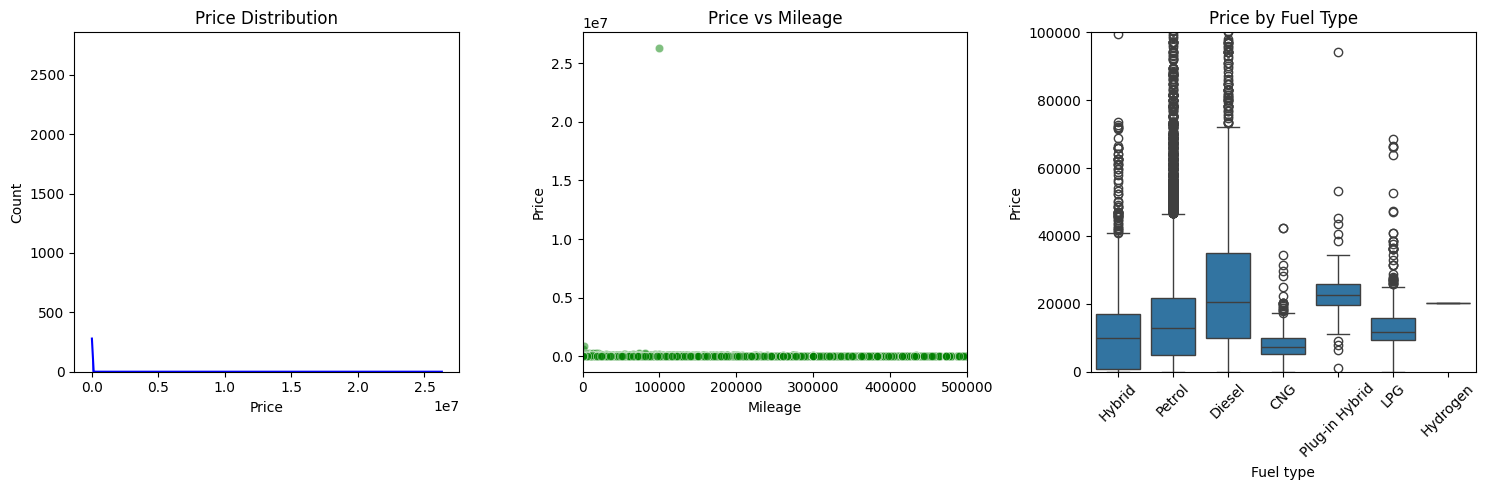

In [9]:
# --- 3. Analysis Report (Visualizations) ---
# We will create a few plots to understand the data before training

plt.figure(figsize=(15, 5))

# Plot 1: Distribution of Price
plt.subplot(1, 3, 1)
sns.histplot(df['Price'], kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')

# Plot 2: Price vs Mileage (Scatter)
plt.subplot(1, 3, 2)
sns.scatterplot(x='Mileage', y='Price', data=df, alpha=0.5, color='green')
plt.title('Price vs Mileage')
# Limit x-axis because some mileage outliers might distort the plot
plt.xlim(0, 500000)

# Plot 3: Price by Fuel Type (Boxplot)
plt.subplot(1, 3, 3)
sns.boxplot(x='Fuel type', y='Price', data=df)
plt.title('Price by Fuel Type')
plt.xticks(rotation=45)
plt.ylim(0, 100000) # Limit y-axis to see the boxes clearly

plt.tight_layout()
plt.show()




In [10]:
# --- 4. Prepare for Linear Regression ---

# Handle Outliers (Optional but recommended for Linear Regression)
# Let's filter reasonably priced cars and mileage for better model accuracy
df_filtered = df[(df['Price'] < 100000) & (df['Price'] > 500)]

# Convert Categorical Columns to Numbers (One-Hot Encoding)
# Columns like Manufacturer, Model, Category, Leather, etc.
df_final = pd.get_dummies(df_filtered, drop_first=True)

# Define X (Features) and y (Target)
X = df_final.drop('Price', axis=1)
y = df_final['Price']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:

# --- 5. Train Model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- 6. Evaluation Report ---
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\n--- Model Analysis Report ---")
print(f"Model R-Squared Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")



--- Model Analysis Report ---
Model R-Squared Score: 0.4436
Mean Absolute Error: 7892.81


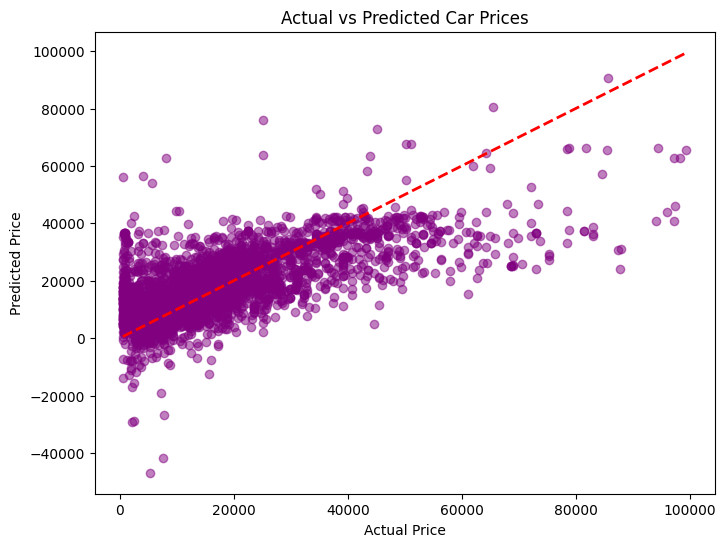

In [12]:

# Visualize Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()